# FERM 502 - Derivatives Best Practices - Homework I - Nafiz Emir Eğilli

-----------------------------------------

### Q1-) A trader owns 55,000 troy oz of silver and decides to hedge with 6-month silver futures contracts. The silver spot price is 23 dollars per troy ounce and the six-month futures price is $23.6 per troy ounce. Each futures contract is on 5,000 troy oz. The standard deviation of the change in the spot price of silver is 0.32. The standard deviation of the change in silver futures prices is 0.27. The coefficient of correlation between the two is 0.92.
### a. What is the optimal hedge ratio? 
### b. What is the optimal number of futures contracts?

### ANSWER: 
### a-) Optimal Hedge Ratio (h*) formula: $ h^* = \rho * \frac{\sigma_s}{\sigma_p} = 0.92 * \frac{0.32}{0.27} = 1.09 $

### b-) Optimal Number of Futures Contracts: $ N^* = h^* * \frac{Q_s}{Q_f} = 1.09 * \frac{55000}{5000} = 11.99 $

-----------------------------------------

### Q2-) Download daily gold futures prices from Yahoo Finance for last 1 month. (Gold futures ticker: GC=F) Suppose that you have 5 Long Gold futures contract where initial margin is 8500$ and maintenance margin is 7400 dollars for one contract. (Contract size is 100 oz of gold) Provide a daily table for each of the day as below:

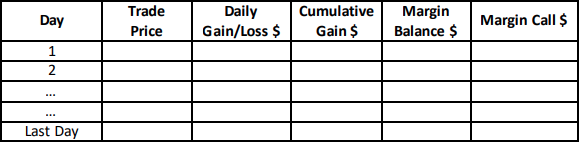

### ANSWER:

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

In [2]:
# Download the data for Gold Futures 'GC=F'
data = yf.download('GC=F', start="2024-01-27", end="2024-02-28")
# 5 contracts, each contract of 100 oz
data['Daily Gain/Loss $'] = data['Adj Close'].diff() * 100 * 5

# Initial and maintenance margins
initial_margin = 8500 * 5
maintenance_margin = 7400 * 5

# Cumulative Gain/Loss
data['Cumulative Gain $'] = data['Daily Gain/Loss $'].cumsum()

# Initial margin balance changes daily based on the cumulative gain/loss
data['Margin Balance $'] = initial_margin + data['Cumulative Gain $']

# Margin call is issued when balance falls below maintenance margin
data['Margin Call $'] = np.where(data['Margin Balance $'] < maintenance_margin,
                                 maintenance_margin - data['Margin Balance $'],
                                 0)

# Fill NaN values with zeroes
data['Daily Gain/Loss $'] = data['Daily Gain/Loss $'].fillna(0)
data['Cumulative Gain $'] = data['Cumulative Gain $'].fillna(0)
data['Margin Balance $'] = data['Margin Balance $'].fillna(0)

# Reset index to move the Date from index to column
data.reset_index(inplace=True)

# Select only the relevant columns
data = data[['Date', 'Close', 'Daily Gain/Loss $', 'Cumulative Gain $', 'Margin Balance $', 'Margin Call $']]
data

[*********************100%***********************]  1 of 1 completed


,Date,Close,Daily Gain/Loss $,Cumulative Gain $,Margin Balance $,Margin Call $
0,2024-01-29,2025.199951,0.000000,0.000000,0.000000,0.000000
1,2024-01-30,2031.500000,3150.024414,3150.024414,45650.024414,0.000000
2,2024-01-31,2048.399902,8449.951172,11599.975586,54099.975586,0.000000
3,2024-02-01,2053.000000,2300.048828,13900.024414,56400.024414,0.000000
4,2024-02-02,2036.099976,-8450.012207,5450.012207,47950.012207,0.000000
5,2024-02-05,2025.699951,-5200.012207,250.000000,42750.000000,0.000000
6,2024-02-06,2034.500000,4400.024414,4650.024414,47150.024414,0.000000
7,2024-02-07,2035.199951,349.975586,5000.000000,47500.000000,0.000000
8,2024-02-08,2032.199951,-1500.000000,3500.000000,46000.000000,0.000000
9,2024-02-09,2023.300049,-4449.951172,-949.951172,41550.048828,0.000000


-----------------------------------------

### Q3-) Suppose that an interest rate swap pays floating 6 month LIBOR versus 6% fixed, semiannually. The notional is $100 million and the remaining life of the swap is 1.75 years. The last 6-month LIBOR rate was 3.2%. Suppose we know that LIBOR continuously compounded is 3%, 3.5%, 3.7%, and 4.3% for the 3-month, 9-month, 15-month, and 21- month periods. What is the value of this swap?

### ANSWER:
### Value of the swap: $ V_{swap} = PV_{fixed} - PV_{floating} $
### Present value of a series of cash flows: 
## $ PV = \sum_{i=1}^{n} \frac{C_i}{e^{r_i \cdot t_i}} $

In [3]:
notional = 100e6  # $100 million
fixed_rate_annual = 0.06  # 6% fixed annually
fixed_payment_semiannual = fixed_rate_annual / 2 * notional  # $3 million every six months

# The semiannual periods for the remaining life of the swap (1.75 years)
periods = [0.5, 1, 1.5]

# Continuously compounded LIBOR rates for the future periods
libor_rates = [0.03, 0.035, 0.037, 0.043]  # Rates for 3-month, 9-month, 15-month, 21-month

# The present value of the fixed leg payments
pv_fixed_leg = sum([fixed_payment_semiannual / np.exp(libor_rates[i] * periods[i]) for i in range(len(periods))])

# The present value of the floating leg payments
# The next floating payment is known (3.2% of $100 million semiannually)
next_floating_payment = 0.032 / 2 * notional

# We discount the known next floating payment by the 3-month LIBOR rate as it is the next payment
pv_floating_leg = next_floating_payment / np.exp(libor_rates[0] * 0.25)  # The payment is in 3 months

# For subsequent floating payments, we assume that the floating rate will be set equal to the current forward rates given by the LIBOR rates
# We discount those by the same LIBOR rates for simplicity, as it is a common practice in swap valuation when forward rates are not available
for i in range(1, len(periods)):
    floating_payment = notional * (np.exp(libor_rates[i] * periods[i]) - 1)  # This assumes semiannual compounding
    pv_floating_leg += floating_payment / np.exp(libor_rates[i] * periods[i])

# The value of the swap is the difference between the present values of the fixed and floating legs
value_of_swap = pv_fixed_leg - pv_floating_leg
print(f"Value of the Swap: {value_of_swap:.2f}")

Value of the Swap: -1736112.76


-----------------------------------------

### Q4-) A Turkish bank entered a cross-currency swap some time ago and the swap has exactly 18 months to run. Under the swap, the bank pays a foreign bank a 12-month USD LIBOR rate and receives fixed interest at 25% p.a. (annually compounded) in TRY. Swap interest payments are made yearly. The initial principal amounts of the swap were TRY 200.0 million and USD 10.0 million. The 12-month USD LIBOR rate six months ago was 4% p.a. (annually compounded). The current spot rate of the Turkish Lira is 1 USD = 30 TRY. The current zero-coupon yields in the TRY and USD market are as follows: (c.c. = continuously compounded)

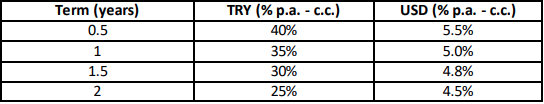

### What is the value of the swap to the Turkish bank today?

### ANSWER:

In [4]:
# Given data
TRY_principal = 200e6  # TRY 200 million
USD_principal = 10e6   # USD 10 million
fixed_TRY_rate = 0.25  # 25% p.a. fixed in TRY
USD_LIBOR = 0.04       # 4% p.a. USD LIBOR
spot_rate = 30         # 1 USD = 30 TRY
remaining_years = 1.5  # 18 months to run

# TRY and USD zero-coupon yields (continuously compounded)
TRY_yield = 0.30  # 30% for 1.5 years
USD_yield = 0.048  # 4.8% for 1.5 years

# Calculate TRY cash flow to be received
TRY_cash_flow = TRY_principal * (1 + fixed_TRY_rate)

# Discount the TRY cash flow to present value
PV_TRY = TRY_cash_flow * np.exp(-TRY_yield * remaining_years)

# Calculate USD cash flow to be paid
USD_cash_flow = USD_principal * (1 + USD_LIBOR)

# Discount the USD cash flow to present value
PV_USD = USD_cash_flow * np.exp(-USD_yield * remaining_years)

# Convert the present value of the TRY cash flow to USD
PV_TRY_in_USD = PV_TRY / spot_rate

# Calculate the net present value of the swap in USD
Value_swap = PV_TRY_in_USD - PV_USD

PV_TRY, PV_USD, PV_TRY_in_USD, Value_swap


(159407037.90544334, 9677521.31643654, 5313567.930181445, -4363953.386255096)

### The present value of the TRY cash flow discounted back to today is approximately TRY 159,407,038. The present value of the USD cash flow discounted back to today is approximately USD 9,677,521. When converting the TRY present value to USD at the current spot rate, we get approximately USD 5,313,568.

### Therefore, the net present value of the swap to the Turkish bank is approximately -USD 4,363,953. This negative value indicates that the swap is a liability to the Turkish bank under the current market conditions. 